In [1]:
import pandas as pd
import numpy as np

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline

/home/akhil/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
col_list = ['iyear', 'imonth','iday','extended','provstate','latitude','longitude','specificity','vicinity','crit1','crit2','crit3','doubtterr',
'multiple', 'natlty1','propextent','ishostkid','ransom','country','city','gname','individual','nkillus','nkillter','nwound','nwoundus',
'nwoundte','property','targtype1','suicide','success','weaptype1','region','attacktype1']

df = pd.read_excel('globalterrorismdb_0919dist.xlsx', usecols=col_list)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        191464 non-null  int64  
 1   imonth       191464 non-null  int64  
 2   iday         191464 non-null  int64  
 3   extended     191464 non-null  int64  
 4   country      191464 non-null  int64  
 5   region       191464 non-null  int64  
 6   provstate    191462 non-null  object 
 7   city         191038 non-null  object 
 8   latitude     186884 non-null  float64
 9   longitude    186883 non-null  float64
 10  specificity  191463 non-null  float64
 11  vicinity     191464 non-null  int64  
 12  crit1        191464 non-null  int64  
 13  crit2        191464 non-null  int64  
 14  crit3        191464 non-null  int64  
 15  doubtterr    191464 non-null  int64  
 16  multiple     191464 non-null  int64  
 17  success      191464 non-null  int64  
 18  suicide      191464 non-

<AxesSubplot:>

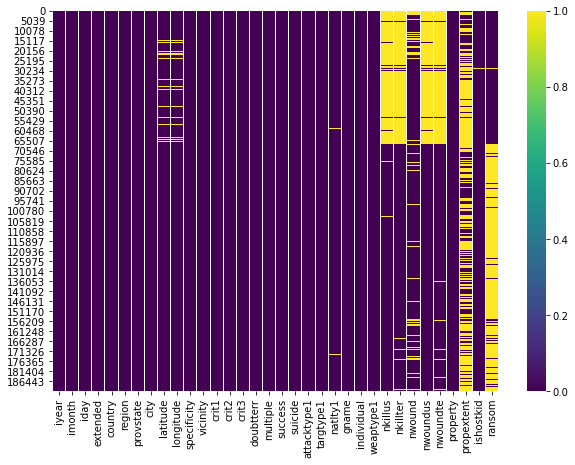

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap='viridis')

In [5]:
df.natlty1.value_counts()

95.0     25522
153.0    14377
92.0     13002
4.0      12567
45.0      8125
         ...  
349.0        1
212.0        1
351.0        1
125.0        1
190.0        1
Name: natlty1, Length: 215, dtype: int64

In [6]:
df.natlty1.isnull().sum()

1722

In [7]:
df.natlty1.mean()

127.28550874345163

In [8]:
df.natlty1.median()

100.0

In [9]:
df.natlty1.mode()[0]

95.0

In [10]:
df.natlty1.value_counts()

95.0     25522
153.0    14377
92.0     13002
4.0      12567
45.0      8125
         ...  
349.0        1
212.0        1
351.0        1
125.0        1
190.0        1
Name: natlty1, Length: 215, dtype: int64

In [11]:
### Filling the natly1 column with the mode value
df['natlty1'] = df['natlty1'].fillna(df['natlty1'].mode()[0])

<AxesSubplot:>

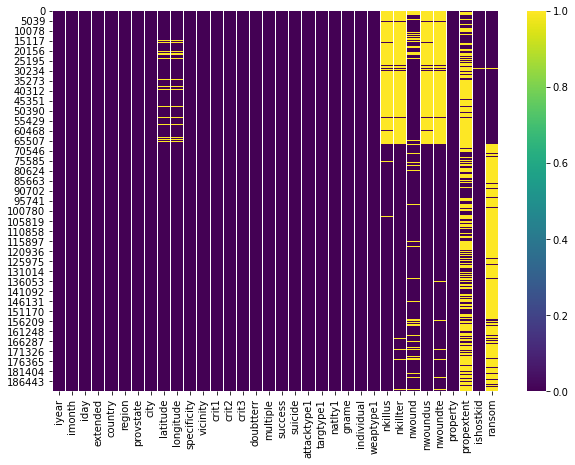

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap='viridis')

In [13]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'provstate',
       'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'targtype1', 'natlty1', 'gname', 'individual',
       'weaptype1', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'propextent', 'ishostkid', 'ransom'],
      dtype='object')

In [14]:
### Dropping the latitude and longitude column
df = df.drop(['latitude', 'longitude'], axis=1)

In [15]:
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,National,Santo Domingo,1.0,0,1,1,1,0,0,1,0,1,14,58.0,MANO-D,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0,0.0
1,1970,0,0,0,130,1,Federal,Mexico city,1.0,0,1,1,1,0,0,1,0,6,7,21.0,23rd of September Communist League,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,1.0,1.0
2,1970,1,0,0,160,5,Tarlac,Unknown,4.0,0,1,1,1,0,0,1,0,1,10,217.0,Unknown,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0,0.0
3,1970,1,0,0,78,8,Attica,Athens,1.0,0,1,1,1,0,0,1,0,3,7,217.0,Unknown,0,6,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0
4,1970,1,0,0,101,4,Fukouka,Fukouka,1.0,0,1,1,1,-9,0,1,0,7,7,217.0,Unknown,0,8,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0


In [16]:
df.nkillus.value_counts()

0.0       126090
1.0          608
2.0          163
3.0           54
4.0           35
5.0           20
6.0           12
7.0            4
17.0           4
9.0            3
15.0           3
10.0           2
11.0           2
60.0           2
8.0            2
13.0           2
30.0           1
31.0           1
44.0           1
182.0          1
14.0           1
241.0          1
16.0           1
189.0          1
1361.0         1
19.0           1
12.0           1
38.0           1
168.0          1
1327.0         1
20.0           1
Name: nkillus, dtype: int64

In [17]:
df.nkillus.isnull().sum()

64443

In [18]:
## From above we can see that the occurance of the value 0.0 is more as compared to the other value
## Replacing the missing values with 0.0

df['nkillus'] = df['nkillus'].fillna(0)

In [19]:
df.nkillus.isnull().any()

False

In [20]:
df.nkillter.value_counts()

0.0      109577
1.0        7052
2.0        2131
3.0        1262
4.0         795
          ...  
92.0          1
140.0         1
136.0         1
90.0          1
301.0         1
Name: nkillter, Length: 99, dtype: int64

In [21]:
### Repeating the same step
df['nkillter'] = df['nkillter'].fillna(0)

In [22]:
df.nwound.value_counts()

0.0      107978
1.0       17148
2.0       10987
3.0        7872
4.0        5201
          ...  
319.0         1
154.0         1
163.0         1
491.0         1
184.0         1
Name: nwound, Length: 240, dtype: int64

In [23]:
df['nwound'] = df['nwound'].fillna(0)

In [24]:
df.nwoundus.isnull().sum()

64700

In [25]:
df.nwoundus.value_counts()

0.0      126079
1.0         320
2.0         119
3.0          64
4.0          38
5.0          22
7.0          16
10.0         14
9.0          14
6.0          11
8.0           9
11.0          6
15.0          6
20.0          4
17.0          4
12.0          3
14.0          3
13.0          2
22.0          2
18.0          1
25.0          1
33.0          1
24.0          1
16.0          1
31.0          1
101.0         1
19.0          1
35.0          1
36.0          1
48.0          1
29.0          1
50.0          1
37.0          1
75.0          1
151.0         1
110.0         1
27.0          1
751.0         1
109.0         1
38.0          1
78.0          1
28.0          1
77.0          1
64.0          1
650.0         1
57.0          1
60.0          1
Name: nwoundus, dtype: int64

In [26]:
df['nwoundus'] = df['nwoundus'].fillna(0)

In [27]:
df.nwoundte.isnull().sum()

69870

In [28]:
df.nwoundte.value_counts()

0.0      118734
1.0         998
2.0         465
3.0         326
4.0         211
5.0         135
6.0         112
7.0          90
10.0         74
8.0          68
9.0          53
11.0         40
15.0         39
13.0         36
12.0         33
20.0         26
14.0         18
16.0         16
24.0         15
17.0         13
30.0         10
18.0          9
25.0          7
40.0          6
23.0          6
19.0          6
22.0          5
21.0          5
50.0          4
60.0          4
33.0          3
35.0          3
26.0          3
100.0         3
27.0          2
51.0          2
32.0          2
31.0          2
49.0          1
65.0          1
41.0          1
62.0          1
53.0          1
28.0          1
101.0         1
38.0          1
150.0         1
200.0         1
Name: nwoundte, dtype: int64

In [29]:
df['nwoundte'] = df['nwoundte'].fillna(0)

In [30]:
df.nwoundte.isnull().any()

False

In [31]:
df.propextent.isnull().sum()

124178

In [32]:
df.propextent.value_counts()

3.0    45792
4.0    20573
2.0      915
1.0        6
Name: propextent, dtype: int64

In [33]:
df.propextent.mode()[0]

3.0

In [34]:
df.propextent.median()

3.0

In [35]:
df['propextent'] = df['propextent'].fillna(df['propextent'].mode()[0])

<AxesSubplot:>

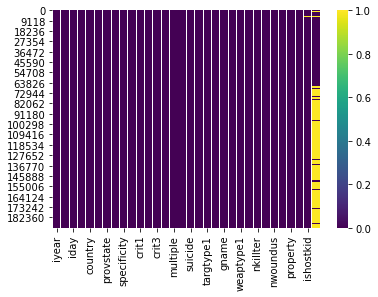

In [36]:
sns.heatmap(df.isnull(), cmap='viridis')

In [37]:
df.ishostkid.isnull().sum()

178

In [38]:
df.ishostkid.value_counts()

 0.0    176243
 1.0     14626
-9.0       417
Name: ishostkid, dtype: int64

In [39]:
df['ishostkid'] = df['ishostkid'].fillna(0)

In [40]:
df.ransom.isnull().sum()

113036

In [41]:
df.ransom.value_counts()

 0.0    75566
-9.0     1497
 1.0     1365
Name: ransom, dtype: int64

In [42]:
df['ransom'] = df['ransom'].fillna(0)

<AxesSubplot:>

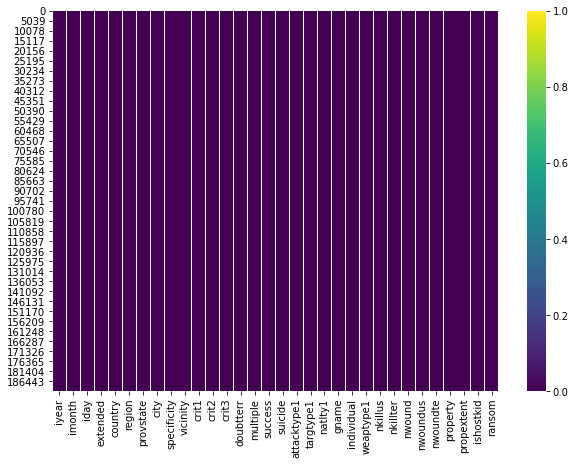

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap='viridis')

In [44]:
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,National,Santo Domingo,1.0,0,1,1,1,0,0,1,0,1,14,58.0,MANO-D,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
1,1970,0,0,0,130,1,Federal,Mexico city,1.0,0,1,1,1,0,0,1,0,6,7,21.0,23rd of September Communist League,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,1.0,1.0
2,1970,1,0,0,160,5,Tarlac,Unknown,4.0,0,1,1,1,0,0,1,0,1,10,217.0,Unknown,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
3,1970,1,0,0,78,8,Attica,Athens,1.0,0,1,1,1,0,0,1,0,3,7,217.0,Unknown,0,6,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0
4,1970,1,0,0,101,4,Fukouka,Fukouka,1.0,0,1,1,1,-9,0,1,0,7,7,217.0,Unknown,0,8,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0


In [45]:
df.provstate.value_counts()

Baghdad             7832
Northern Ireland    4583
Unknown             4340
Balochistan         3911
Saladin             3631
                    ... 
North SInai            1
Kanem                  1
Bicol                  1
Commewyne              1
Western Region         1
Name: provstate, Length: 2579, dtype: int64

In [46]:
df.city.value_counts()

Unknown              10298
Baghdad               7765
Karachi               2673
Lima                  2359
Mosul                 2309
                     ...  
Taylor                   1
Khalwakha                1
Kirikhan district        1
Mako                     1
Kadikoy district         1
Name: city, Length: 39488, dtype: int64

In [47]:
df.vicinity.value_counts()

 0    177874
 1     13555
-9        35
Name: vicinity, dtype: int64

In [48]:
df.iyear.value_counts()

2014    16908
2015    14977
2016    13626
2013    12041
2017    10980
2018     9607
2012     8529
2011     5076
1992     5071
2010     4826
2008     4805
2009     4722
1991     4683
1989     4324
1990     3887
1988     3720
1984     3495
1994     3456
2007     3242
1997     3199
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2661
1981     2586
1982     2544
2005     2017
2001     1913
2000     1824
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [63]:
df.specificity.value_counts()

1.0    151384
3.0     15989
2.0     10556
4.0      8947
5.0      4587
Name: specificity, dtype: int64

In [64]:
df.specificity.isnull().sum()

1

In [65]:
df['specificity'] = df['specificity'].fillna(1.0)

In [50]:
# df.shape

In [51]:
# cleaned_data = (df.pipe(remove_outliers, col_list))

In [52]:
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,National,Santo Domingo,1.0,0,1,1,1,0,0,1,0,1,14,58.0,MANO-D,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
1,1970,0,0,0,130,1,Federal,Mexico city,1.0,0,1,1,1,0,0,1,0,6,7,21.0,23rd of September Communist League,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,1.0,1.0
2,1970,1,0,0,160,5,Tarlac,Unknown,4.0,0,1,1,1,0,0,1,0,1,10,217.0,Unknown,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
3,1970,1,0,0,78,8,Attica,Athens,1.0,0,1,1,1,0,0,1,0,3,7,217.0,Unknown,0,6,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0
4,1970,1,0,0,101,4,Fukouka,Fukouka,1.0,0,1,1,1,-9,0,1,0,7,7,217.0,Unknown,0,8,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0


In [53]:
df.gname.value_counts()

Unknown                                          86261
Taliban                                           8727
Islamic State of Iraq and the Levant (ISIL)       6385
Shining Path (SL)                                 4562
Al-Shabaab                                        3774
                                                 ...  
Alfa 83                                              1
Ganda Koi                                            1
Nicaraguan Democratic Anti-Communist Movement        1
Ultra Conservative Clerical Group                    1
Tolib Ayombekov loyalists                            1
Name: gname, Length: 3617, dtype: int64

In [54]:
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

for i in cat_cols:
    print(i)

provstate
city
gname


In [55]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'O']

for i in num_cols:
    print(i, end=' , ')

iyear , imonth , iday , extended , country , region , specificity , vicinity , crit1 , crit2 , crit3 , doubtterr , multiple , success , suicide , attacktype1 , targtype1 , natlty1 , individual , weaptype1 , nkillus , nkillter , nwound , nwoundus , nwoundte , property , propextent , ishostkid , ransom , 

In [56]:
df.city.value_counts()

Unknown              10298
Baghdad               7765
Karachi               2673
Lima                  2359
Mosul                 2309
                     ...  
Taylor                   1
Khalwakha                1
Kirikhan district        1
Mako                     1
Kadikoy district         1
Name: city, Length: 39488, dtype: int64

In [57]:
df.provstate.value_counts()

Baghdad             7832
Northern Ireland    4583
Unknown             4340
Balochistan         3911
Saladin             3631
                    ... 
North SInai            1
Kanem                  1
Bicol                  1
Commewyne              1
Western Region         1
Name: provstate, Length: 2579, dtype: int64

In [58]:
### Label Encoding the categorical columns

from sklearn.preprocessing import LabelEncoder

# le_col = ['provstate','city','gname']

cat_features=[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [59]:
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,1565,32086,1.0,0,1,1,1,0,0,1,0,1,14,58.0,1944,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
1,1970,0,0,0,130,1,701,23921,1.0,0,1,1,1,0,0,1,0,6,7,21.0,13,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,1.0,1.0
2,1970,1,0,0,160,5,2263,37186,4.0,0,1,1,1,0,0,1,0,1,10,217.0,3485,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
3,1970,1,0,0,78,8,158,2765,1.0,0,1,1,1,0,0,1,0,3,7,217.0,3485,0,6,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0
4,1970,1,0,0,101,4,725,12139,1.0,0,1,1,1,-9,0,1,0,7,7,217.0,3485,0,8,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        191464 non-null  int64  
 1   imonth       191464 non-null  int64  
 2   iday         191464 non-null  int64  
 3   extended     191464 non-null  int64  
 4   country      191464 non-null  int64  
 5   region       191464 non-null  int64  
 6   provstate    191464 non-null  int64  
 7   city         191464 non-null  int64  
 8   specificity  191463 non-null  float64
 9   vicinity     191464 non-null  int64  
 10  crit1        191464 non-null  int64  
 11  crit2        191464 non-null  int64  
 12  crit3        191464 non-null  int64  
 13  doubtterr    191464 non-null  int64  
 14  multiple     191464 non-null  int64  
 15  success      191464 non-null  int64  
 16  suicide      191464 non-null  int64  
 17  attacktype1  191464 non-null  int64  
 18  targtype1    191464 non-

In [66]:
df.isnull().any()

iyear          False
imonth         False
iday           False
extended       False
country        False
region         False
provstate      False
city           False
specificity    False
vicinity       False
crit1          False
crit2          False
crit3          False
doubtterr      False
multiple       False
success        False
suicide        False
attacktype1    False
targtype1      False
natlty1        False
gname          False
individual     False
weaptype1      False
nkillus        False
nkillter       False
nwound         False
nwoundus       False
nwoundte       False
property       False
propextent     False
ishostkid      False
ransom         False
dtype: bool

In [67]:
for columns in df.columns:
    df[columns] = df[columns].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   iyear        191464 non-null  int64
 1   imonth       191464 non-null  int64
 2   iday         191464 non-null  int64
 3   extended     191464 non-null  int64
 4   country      191464 non-null  int64
 5   region       191464 non-null  int64
 6   provstate    191464 non-null  int64
 7   city         191464 non-null  int64
 8   specificity  191464 non-null  int64
 9   vicinity     191464 non-null  int64
 10  crit1        191464 non-null  int64
 11  crit2        191464 non-null  int64
 12  crit3        191464 non-null  int64
 13  doubtterr    191464 non-null  int64
 14  multiple     191464 non-null  int64
 15  success      191464 non-null  int64
 16  suicide      191464 non-null  int64
 17  attacktype1  191464 non-null  int64
 18  targtype1    191464 non-null  int64
 19  natlty1      191464 non

In [70]:
df.to_csv('cleaned_data.csv')